## comentarios

### Regresión Polinomial y Validación Cruzada (10pts)
A pesar de emplear la técnica de validación cruzada, la presentación de los resultados puede generar confusión, ya que no se muestra claramente cómo se corresponden los datos con la separación en diferentes folds.

### ***puntos 7/10***

### **Regularización**

no usa validación cruzada en  todo el conjunto de datos

```
# aca veo que usa solo un landa
  lasso_reg_model = Lasso(alpha=0.8, max_iter=100000)

#El entrenamiento no va variando de datos usa solo el train
  poly_features_lasso = poly.fit_transform(xTrain.reshape(-1, 1))
  lasso_reg_model.fit(poly_features_lasso, yTrain)

  y_predicted = lasso_reg_model.predict(poly_features_lasso)
  plt.plot(xTrain, yTrain, 'o', label='Train data')
  plt.plot(xVal, yVal, '*', label='Validation data')
  plt.plot(x_LS, lasso_reg_model.predict(poly.fit_transform(x_LS.reshape(-1, 1))), '-', alpha=0.8, label='Learned model', linewidth=2)
  
```

### ***puntos 4/10***


### **bootstrap*

Ok, solo falto la gráfica de  confianza


### ***puntos 8/10***


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, LeavePOut
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.utils import resample

Mounted at /content/drive


## Punto 2

In [ ]:
xTrain = np.load("/content/drive/MyDrive/Colab Notebooks/numpy_arrays/part2xTrain.npy")
xVal = np.load("/content/drive/MyDrive/Colab Notebooks/numpy_arrays/part2xVal.npy")
yTrain = np.load("/content/drive/MyDrive/Colab Notebooks/numpy_arrays/part2yTrain.npy")
yVal = np.load("/content/drive/MyDrive/Colab Notebooks/numpy_arrays/part24yVal.npy")

In [ ]:
orders = range(1,10)

In [ ]:
X = np.concatenate((xTrain, xVal), axis=None)
Y = np.concatenate((yTrain, yVal), axis=None)

In [ ]:
custom_scoring = make_scorer(mean_absolute_error)

### 2.A Regresión Polinomial y Validación Cruzada

Calculemos modelos de grado entre 1 y 9 usaremos validación cruzada para encontrar el mejor modelo.

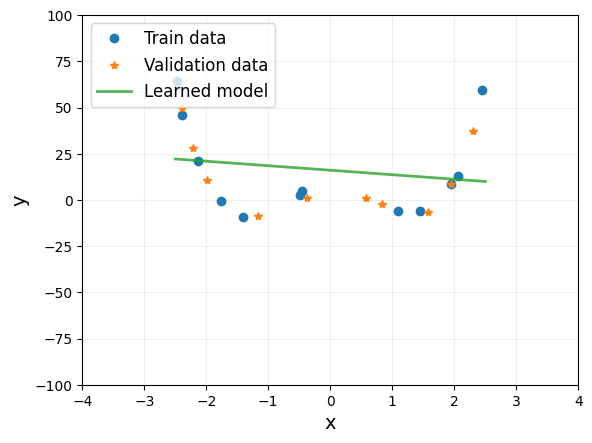

['order: ', 1, 'avg_mae: ', 19.62490920876555, 'avg_mse: ', -611.2473474947698, 'modelo: ', array([-2.4377328])]


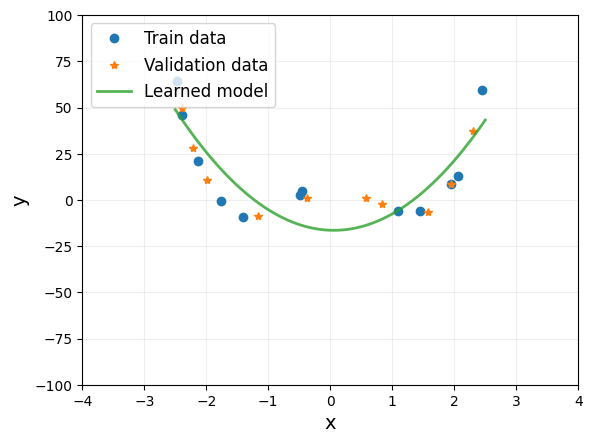

['order: ', 2, 'avg_mae: ', 12.989442954024588, 'avg_mse: ', -209.0742958632487, 'modelo: ', array([-1.13119757,  9.99631441])]


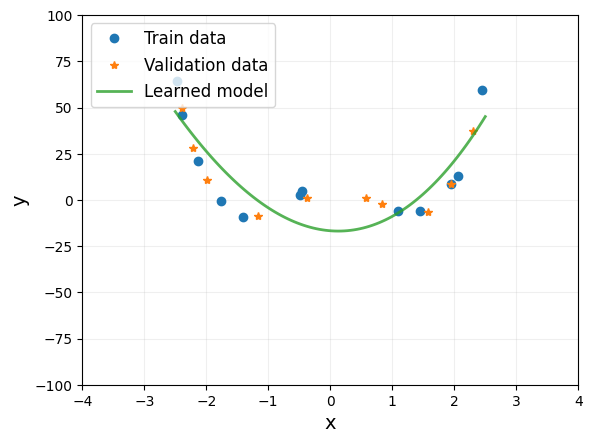

['order: ', 3, 'avg_mae: ', 13.983977886904974, 'avg_mse: ', -260.7685587813729, 'modelo: ', array([-2.64198852, 10.10281188,  0.33544213])]


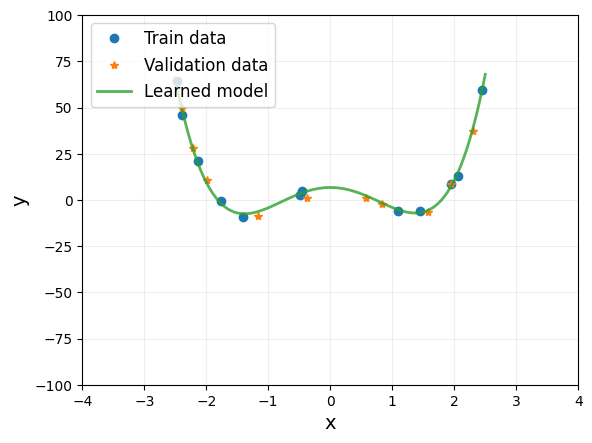

['order: ', 4, 'avg_mae: ', 1.799375877693871, 'avg_mse: ', -4.661087990095342, 'modelo: ', array([  0.03133066, -14.81585256,   0.06033144,   3.91219511])]


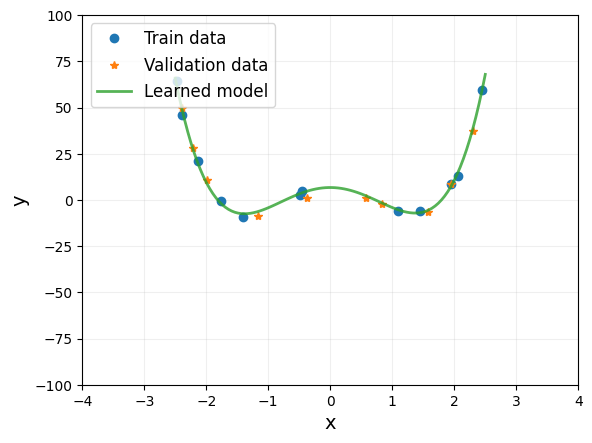

['order: ', 5, 'avg_mae: ', 1.9254620071745625, 'avg_mse: ', -5.382493879323168, 'modelo: ', array([-4.19551892e-02, -1.48019992e+01,  1.03850082e-01,  3.91025180e+00,
       -5.44334607e-03])]


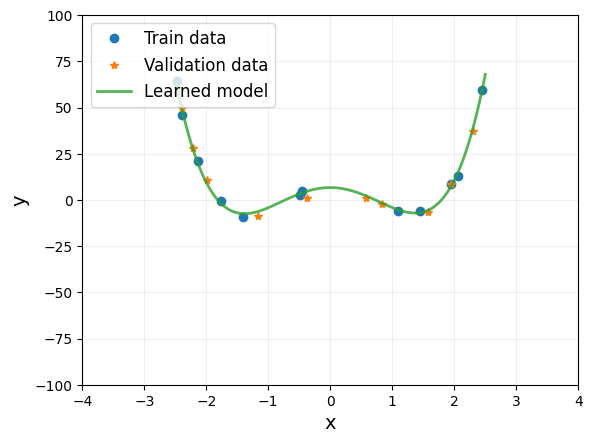

['order: ', 6, 'avg_mae: ', 2.130099595183953, 'avg_mse: ', -7.022588379972458, 'modelo: ', array([-6.39481137e-02, -1.47348916e+01,  1.14984387e-01,  3.88359373e+00,
       -6.69584552e-03,  2.75755479e-03])]


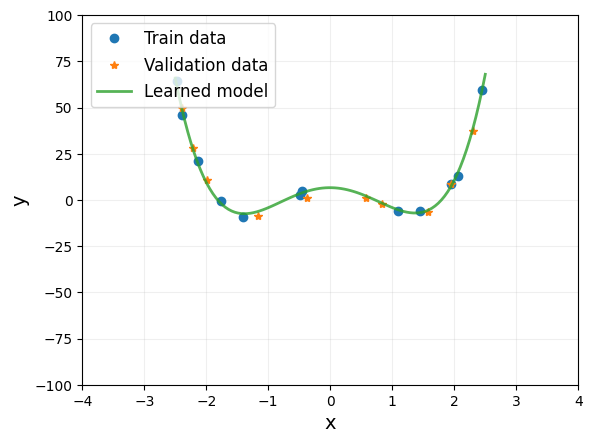

['order: ', 7, 'avg_mae: ', 2.419380013004615, 'avg_mse: ', -12.905583144816502, 'modelo: ', array([-1.76433555e-01, -1.46650879e+01,  2.30382630e-01,  3.86091771e+00,
       -4.02035903e-02,  4.85437811e-03,  2.90599219e-03])]


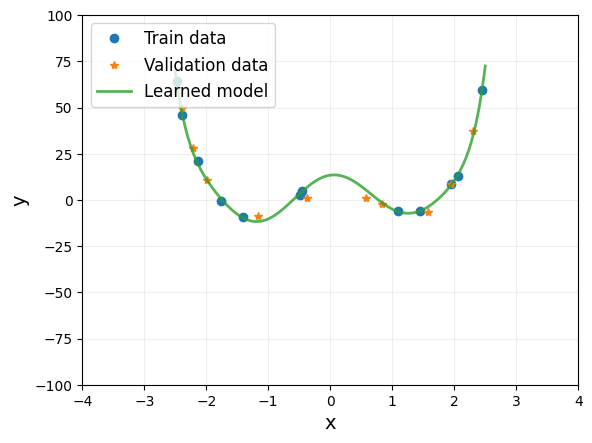

['order: ', 8, 'avg_mae: ', 1.745539331502569, 'avg_mse: ', -4.916335036346101, 'modelo: ', array([ 4.78062532e+00, -3.73076530e+01, -2.45084285e+00,  1.98884071e+01,
        3.29179238e-01, -3.90076506e+00, -6.87918630e-03,  3.05464589e-01])]


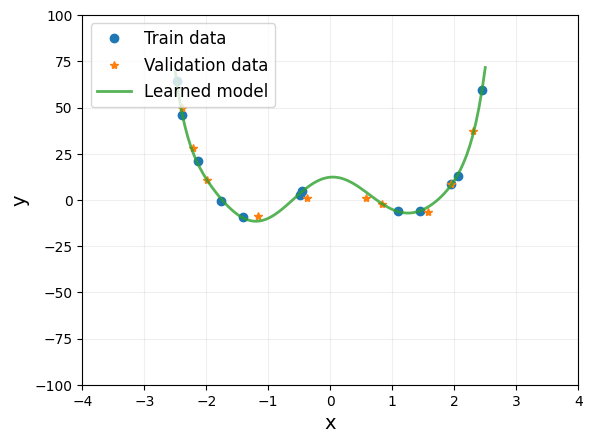

['order: ', 9, 'avg_mae: ', 2.593423185986979, 'avg_mse: ', -42.49709598761111, 'modelo: ', array([ 2.85276612e+00, -3.50147343e+01,  3.64210749e-01,  1.84581955e+01,
       -1.08308891e+00, -3.56511620e+00,  2.81470588e-01,  2.79460040e-01,
       -2.03768321e-02])]


In [ ]:
leave_p_out = LeavePOut(p=2)
x_LS = np.linspace(-2.5,2.5,100).T
modelosScores= []
#MSE Y MAE
for order in orders:
  leave_p_out = LeavePOut(p=2)
  poly = PolynomialFeatures(degree=int(order), include_bias=False)
  poly_features = poly.fit_transform(X.reshape(-1, 1))
  poly_reg_model = LinearRegression()

  mae_scores = cross_val_score(poly_reg_model, poly_features, Y, cv=leave_p_out, scoring=custom_scoring)
  average_mae = np.mean(mae_scores)
  mse_scores = cross_val_score(poly_reg_model, poly_features, Y, cv=leave_p_out, scoring='neg_mean_squared_error')
  average_mse = np.mean(mse_scores)


  modelosScores.append(["order: ", order, "avg_mae: ", average_mae, "avg_mse: ", average_mse, "modelo: ", poly_reg_model, "training MAW"])
  poly_features = poly.fit_transform(xTrain.reshape(-1, 1))
  poly_reg_model.fit(poly_features, yTrain)

  y_predicted = poly_reg_model.predict(poly_features)
  plt.plot(xTrain, yTrain, 'o', label='Train data')
  plt.plot(xVal, yVal, '*', label='Validation data')
  plt.plot(x_LS, poly_reg_model.predict(poly.fit_transform(x_LS.reshape(-1, 1))), '-', alpha=0.8, label='Learned model', linewidth=2)
  plt.xlabel("x", fontsize=14)
  plt.ylabel("y",fontsize=14)
  plt.xlim(-4,4)
  plt.ylim(-100,100)
  plt.grid(alpha=0.2)
  plt.legend(loc='upper left', fontsize=12)
  plt.show()


  print(["order: ", order, "avg_mae: ", average_mae, "avg_mse: ", average_mse, "modelo: ", poly_reg_model.coef_])


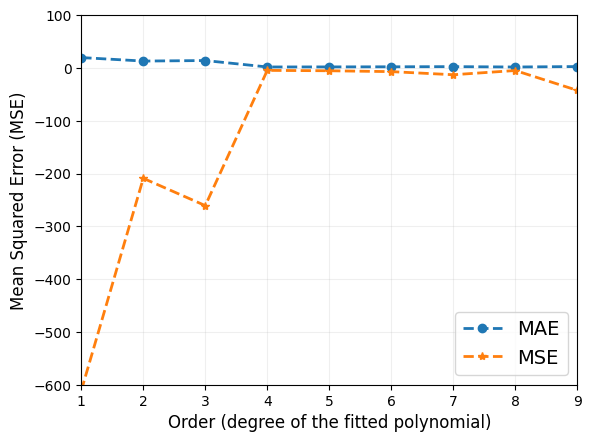

In [ ]:
maeList = []
mseList = []
for i in range(len(modelosScores)):
  maeList.append(modelosScores[i][3])
  mseList.append(modelosScores[i][5])

plt.plot(orders, list(maeList), '--o', label='MAE', linewidth=2)
plt.plot(orders, list(mseList), '--*', label='MSE', linewidth=2)

plt.xlabel("Order (degree of the fitted polynomial)", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.xlim(1,9)
plt.ylim(-600,100)
plt.grid(alpha=0.2)

plt.legend(fontsize=14)
plt.show()

Podemos ver que entre los grados 4 y 8 el MSE y el MAE no varía demasiado

### 2.B Mejora del Modelo con Regularización

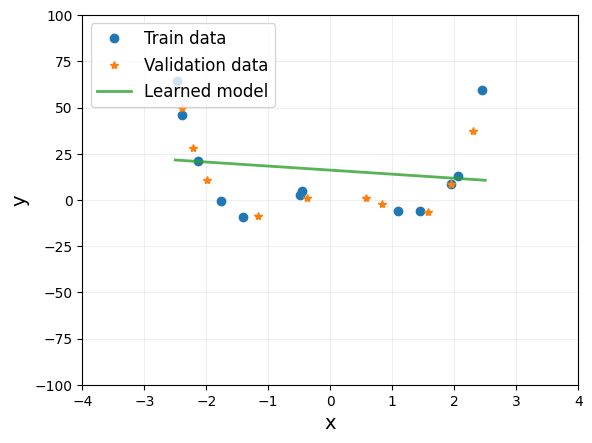

['order: ', 1, 'avg_mae: ', 19.62490920876555, 'avg_mse: ', -611.2473474947698, 'modelo: ', array([-2.4377328])] modelo con regularizacion de Lasso: [-2.19089324]


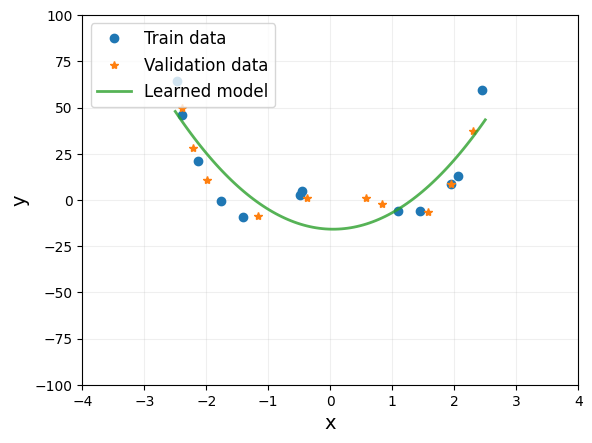

['order: ', 2, 'avg_mae: ', 12.989442954024588, 'avg_mse: ', -209.0742958632487, 'modelo: ', array([-1.13119757,  9.99631441])] modelo con regularizacion de Lasso: [-0.90629336  9.82850901]


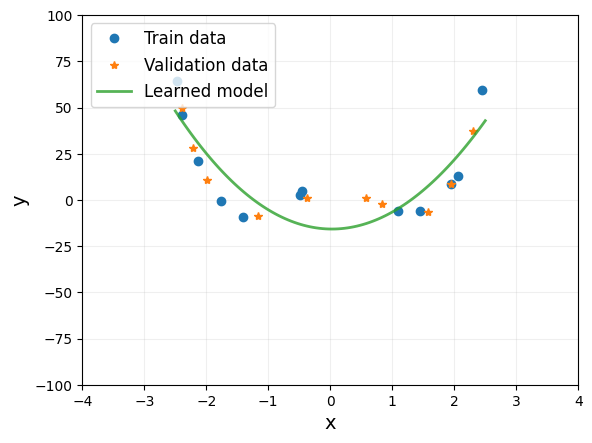

['order: ', 3, 'avg_mae: ', 13.983977886904974, 'avg_mse: ', -260.7685587813729, 'modelo: ', array([-2.64198852, 10.10281188,  0.33544213])] modelo con regularizacion de Lasso: [-0.51924032  9.80122721 -0.0861265 ]


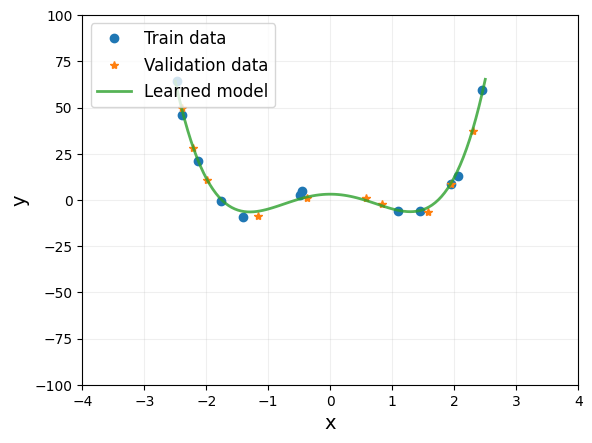

['order: ', 4, 'avg_mae: ', 1.799375877693871, 'avg_mse: ', -4.661087990095342, 'modelo: ', array([  0.03133066, -14.81585256,   0.06033144,   3.91219511])] modelo con regularizacion de Lasso: [  0.         -11.39372079   0.03027317   3.4020272 ]


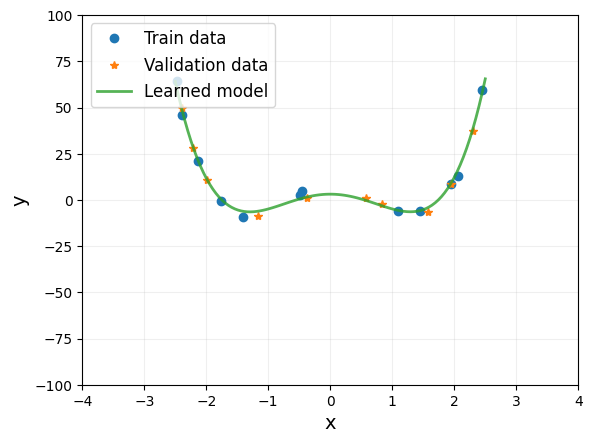

['order: ', 5, 'avg_mae: ', 1.9254620071745625, 'avg_mse: ', -5.382493879323168, 'modelo: ', array([-4.19551892e-02, -1.48019992e+01,  1.03850082e-01,  3.91025180e+00,
       -5.44334607e-03])] modelo con regularizacion de Lasso: [-0.00000000e+00 -1.14066557e+01  0.00000000e+00  3.40533718e+00
  6.93758851e-03]


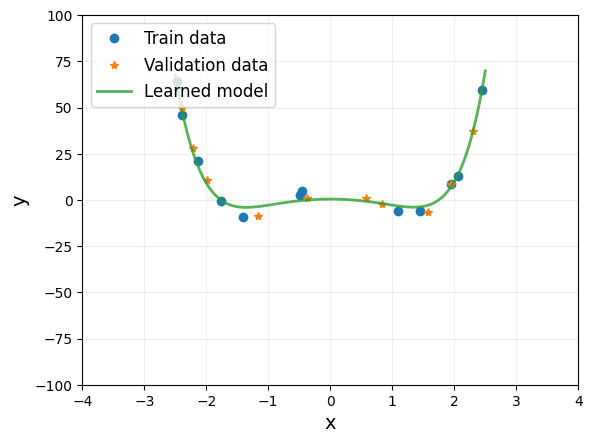

['order: ', 6, 'avg_mae: ', 2.130099595183953, 'avg_mse: ', -7.022588379972458, 'modelo: ', array([-6.39481137e-02, -1.47348916e+01,  1.14984387e-01,  3.88359373e+00,
       -6.69584552e-03,  2.75755479e-03])] modelo con regularizacion de Lasso: [-0.         -3.55796667  0.         -0.0764312   0.01139735  0.38264783]


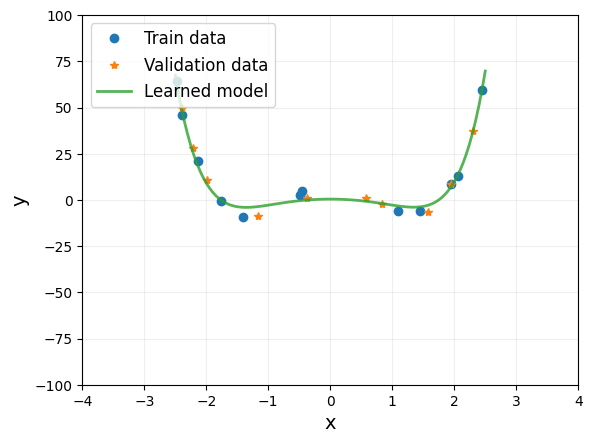

['order: ', 7, 'avg_mae: ', 2.419380013004615, 'avg_mse: ', -12.905583144816502, 'modelo: ', array([-1.76433555e-01, -1.46650879e+01,  2.30382630e-01,  3.86091771e+00,
       -4.02035903e-02,  4.85437811e-03,  2.90599219e-03])] modelo con regularizacion de Lasso: [-0.         -3.55811139  0.         -0.0763742   0.01139732  0.38264199
  0.        ]


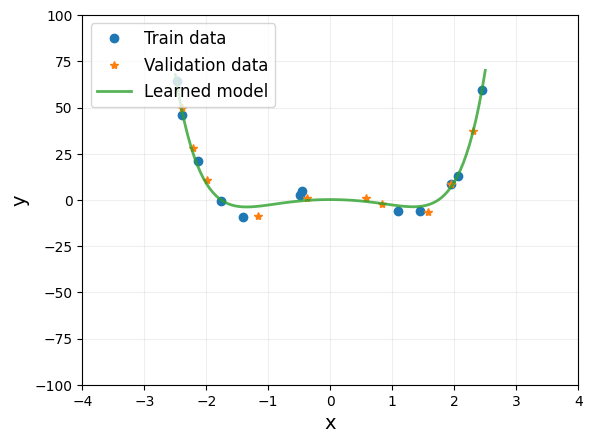

['order: ', 8, 'avg_mae: ', 1.745539331502569, 'avg_mse: ', -4.916335036346101, 'modelo: ', array([ 4.78062532e+00, -3.73076530e+01, -2.45084285e+00,  1.98884071e+01,
        3.29179238e-01, -3.90076506e+00, -6.87918630e-03,  3.05464589e-01])] modelo con regularizacion de Lasso: [-0.         -3.25404412  0.         -0.          0.01145771  0.31295708
  0.          0.00833235]


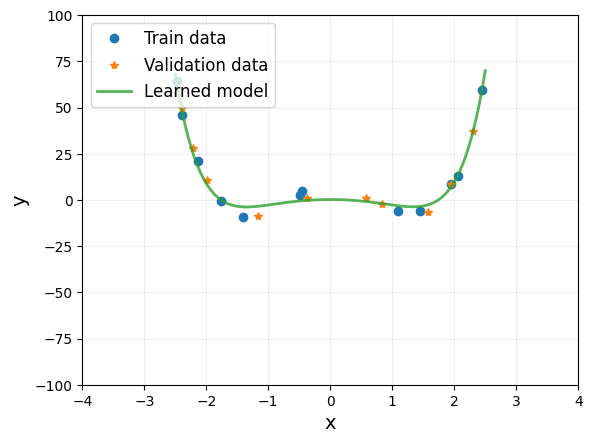

['order: ', 9, 'avg_mae: ', 2.593423185986979, 'avg_mse: ', -42.49709598761111, 'modelo: ', array([ 2.85276612e+00, -3.50147343e+01,  3.64210749e-01,  1.84581955e+01,
       -1.08308891e+00, -3.56511620e+00,  2.81470588e-01,  2.79460040e-01,
       -2.03768321e-02])] modelo con regularizacion de Lasso: [-0.00000000e+00 -3.27434091e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  3.15294630e-01  6.99756483e-03  8.01796555e-03
 -8.61731269e-04]


In [ ]:
leave_p_out = LeavePOut(p=2)
x_LS = np.linspace(-2.5,2.5,100).T
modelosScores= []
#MSE Y MAE
for order in orders:
  leave_p_out = LeavePOut(p=2)
  poly = PolynomialFeatures(degree=int(order), include_bias=False)
  poly_features = poly.fit_transform(X.reshape(-1, 1))
  poly_reg_model = LinearRegression()

  mae_scores = cross_val_score(poly_reg_model, poly_features, Y, cv=leave_p_out, scoring=custom_scoring)
  average_mae = np.mean(mae_scores)
  mse_scores = cross_val_score(poly_reg_model, poly_features, Y, cv=leave_p_out, scoring='neg_mean_squared_error')
  average_mse = np.mean(mse_scores)

  modelosScores.append(["order: ", order, "avg_mae: ", average_mae, "avg_mse: ", average_mse, "modelo: ", poly_reg_model, "training MAW"])
  poly_features = poly.fit_transform(xTrain.reshape(-1, 1))
  poly_reg_model.fit(poly_features, yTrain)

  lasso_reg_model = Lasso(alpha=0.8, max_iter=100000)

  poly_features_lasso = poly.fit_transform(xTrain.reshape(-1, 1))
  lasso_reg_model.fit(poly_features_lasso, yTrain)

  y_predicted = lasso_reg_model.predict(poly_features_lasso)
  plt.plot(xTrain, yTrain, 'o', label='Train data')
  plt.plot(xVal, yVal, '*', label='Validation data')
  plt.plot(x_LS, lasso_reg_model.predict(poly.fit_transform(x_LS.reshape(-1, 1))), '-', alpha=0.8, label='Learned model', linewidth=2)
  plt.xlabel("x", fontsize=14)
  plt.ylabel("y",fontsize=14)
  plt.xlim(-4,4)
  plt.ylim(-100,100)
  plt.grid(alpha=0.2)
  plt.legend(loc='upper left', fontsize=12)
  plt.show()


  print(["order: ", order, "avg_mae: ", average_mae, "avg_mse: ", average_mse, "modelo: ", poly_reg_model.coef_], "modelo con regularizacion de Lasso:", lasso_reg_model.coef_)

Como se puede notar, a partir del cuarto grado, después de regularizar con lasso, todas las regresiones, se aproximan a una de grado 4, por lo tanto va a ser el grado que vamos a escoger para nuestro modelo.

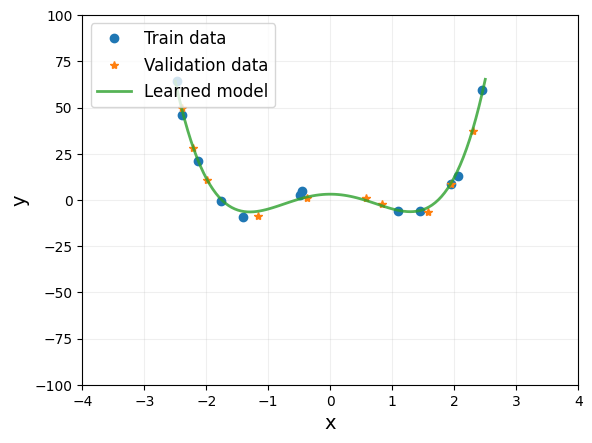

['order: ', 4, 'avg_mae: ', 1.799375877693871, 'avg_mse: ', -4.661087990095342, 'modelo: ', array([  0.03133066, -14.81585256,   0.06033144,   3.91219511])] modelo con regularizacion de Lasso: [  0.         -11.39372079   0.03027317   3.4020272 ]


In [ ]:
leave_p_out = LeavePOut(p=2)
x_LS = np.linspace(-2.5,2.5,100).T
modelosScores= []
#MSE Y MAE
leave_p_out = LeavePOut(p=2)
poly = PolynomialFeatures(degree=int(4), include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = LinearRegression()
mae_scores = cross_val_score(poly_reg_model, poly_features, Y, cv=leave_p_out, scoring=custom_scoring)
average_mae = np.mean(mae_scores)
mse_scores = cross_val_score(poly_reg_model, poly_features, Y, cv=leave_p_out, scoring='neg_mean_squared_error')
average_mse = np.mean(mse_scores)
modelosScores.append(["order: ", 4, "avg_mae: ", average_mae, "avg_mse: ", average_mse, "modelo: ", poly_reg_model, "training MAW"])
poly_features = poly.fit_transform(xTrain.reshape(-1, 1))
poly_reg_model.fit(poly_features, yTrain)

lasso_reg_model = Lasso(alpha=0.8, max_iter=100000)

poly_features_lasso = poly.fit_transform(xTrain.reshape(-1, 1))
lasso_reg_model.fit(poly_features_lasso, yTrain)

y_predicted = lasso_reg_model.predict(poly_features_lasso)
plt.plot(xTrain, yTrain, 'o', label='Train data')
plt.plot(xVal, yVal, '*', label='Validation data')
plt.plot(x_LS, lasso_reg_model.predict(poly.fit_transform(x_LS.reshape(-1, 1))), '-', alpha=0.8, label='Learned model', linewidth=2)
plt.xlabel("x", fontsize=14)
plt.ylabel("y",fontsize=14)
plt.xlim(-4,4)
plt.ylim(-100,100)
plt.grid(alpha=0.2)
plt.legend(loc='upper left', fontsize=12)
plt.show()


print(["order: ", 4, "avg_mae: ", average_mae, "avg_mse: ", average_mse, "modelo: ", poly_reg_model.coef_], "modelo con regularizacion de Lasso:", lasso_reg_model.coef_)

### 2.C Evaluación con Bootstrap


In [ ]:
poly = PolynomialFeatures(degree=int(4), include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = LinearRegression()
n_bootstrap = 300
mse_scorees = []
for _ in range(n_bootstrap):
    X_bootstrap, Y_bootstrap = resample(poly_features, Y, replace=True)
    poly_reg_model.fit(X_bootstrap, Y_bootstrap)
    y_pred = poly_reg_model.predict(poly_features)
    mse = mean_squared_error(Y, y_pred)
    mse_scorees.append(mse)

Distribución del bootsrap con su respectivo intervalo de confianza entre las líneas punteadas verde y roja:

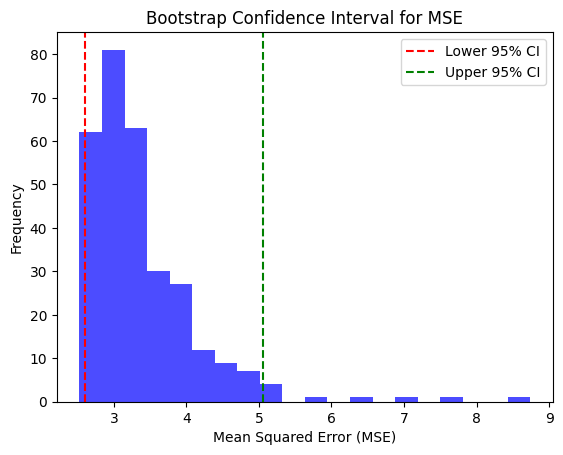

In [ ]:
confidence_interval = np.percentile(mse_scorees, [2.5, 97.5])
plt.hist(mse_scorees, bins=20, color='blue', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='Upper 95% CI')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title('Bootstrap Confidence Interval for MSE')
plt.legend()
plt.show()